Importing necessary library


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")# to handle warning msg

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


Loading the data


In [3]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
train.subject.value_counts()

,count
subject,
25,409
21,408
26,392
30,383
28,382
27,376
23,372
17,368
16,366


Data Preprocessing

checking duplicate

In [7]:
print('total number of duplicate data in training set: ', sum(train.duplicated()))
print('total number of duplicate data in training set', sum(test.duplicated()))

total number of duplicate data in training set:  0
total number of duplicate data in training set 0


missing values?



In [8]:
print('total number of missing data in training set: ', (train.isna().values.sum()))
print('total number of missing data in training set', (test.isna().values.sum()))

total number of missing data in training set:  0
total number of missing data in training set 0


imbalance data check

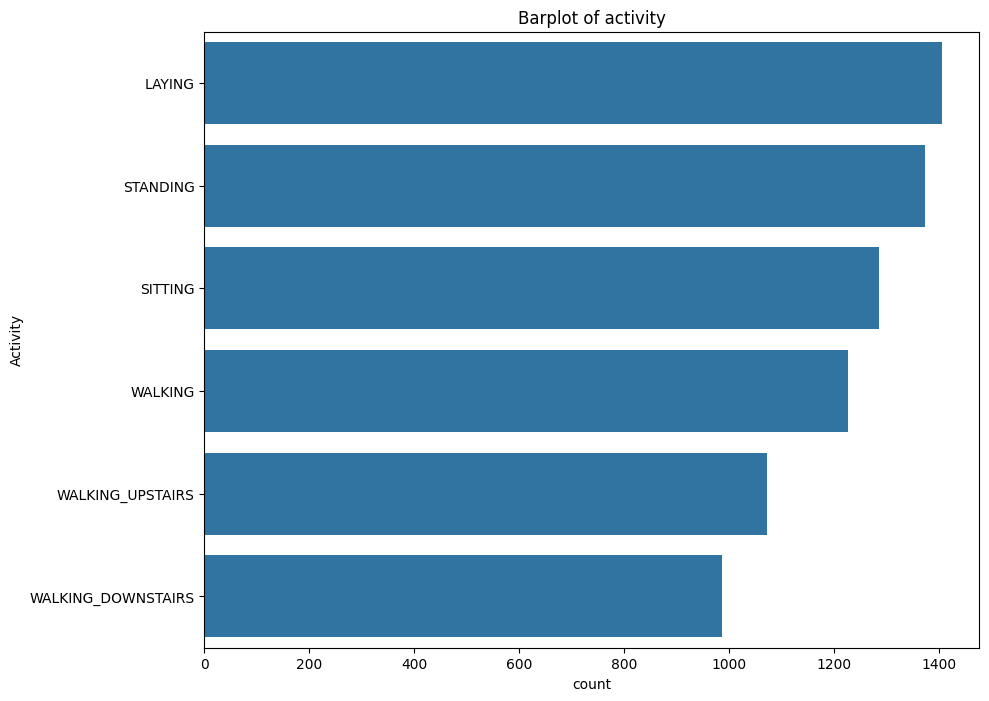

In [9]:
plt.figure(figsize=(10,8))
plt.title('Barplot of activity')
sns.countplot(train.Activity, order=train.Activity.value_counts().index)
plt.show()

All 6 activities is having same number of observation which implies this data doesn't has any imbalance prob.


**Data Analyssis**
```
# feaures?
```



In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)



,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Analysing tbodyAccMag-mean feature

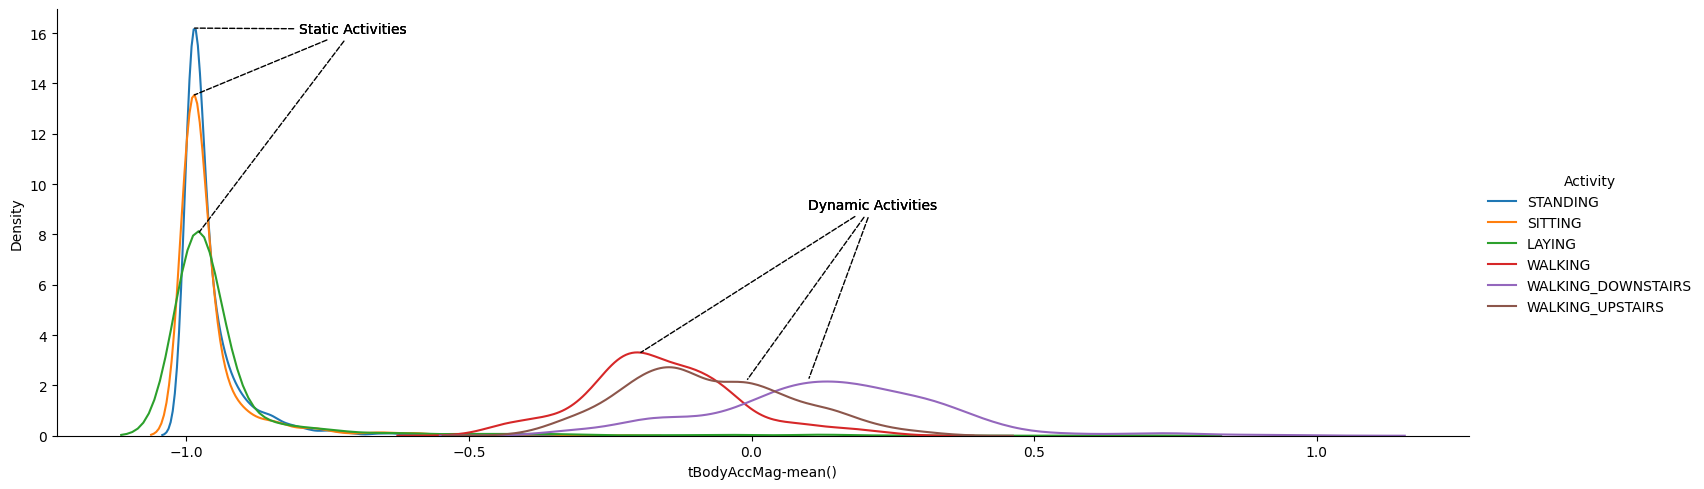

In [12]:
facetgrid=sns.FacetGrid(train,hue='Activity',height=5, aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist =False).add_legend()

plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.99, 13.5), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.99, 16.2), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()


3curve at -1.0 is static activity standing sitting and laying and dynamic activities lies b/w -0.5 to 0.5


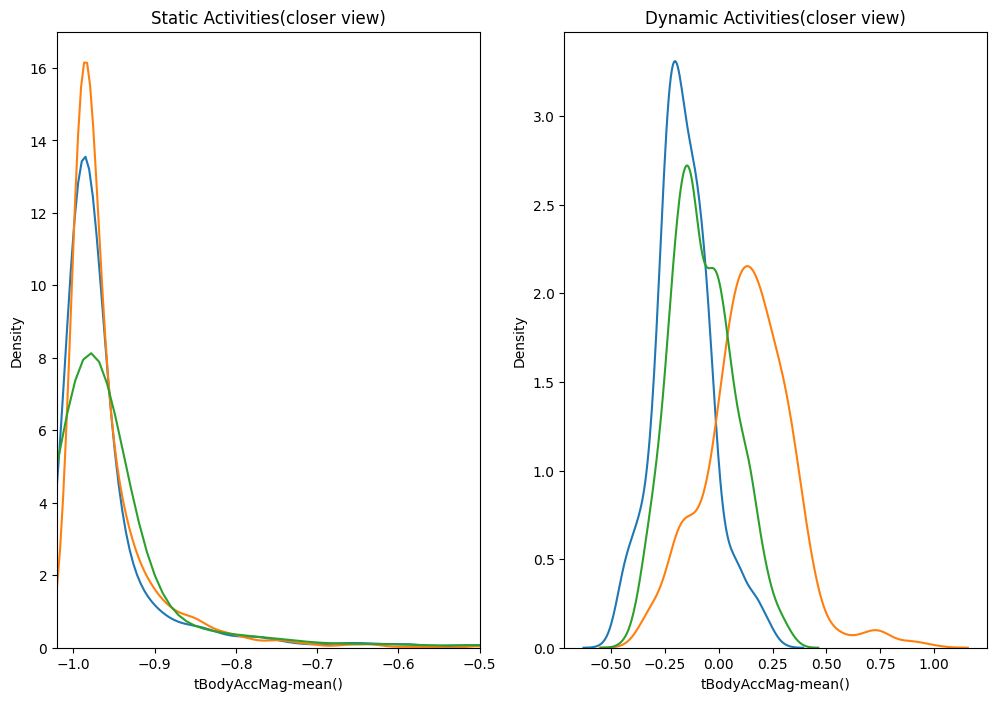

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 17])

plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()

# ** the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories.**

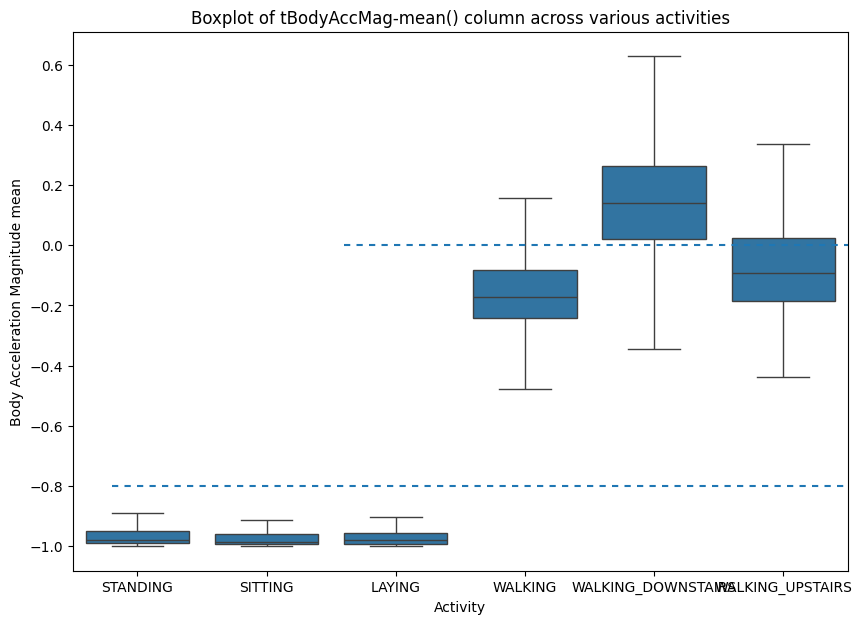

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.show()

# **Analysing Angle between X-axis and gravityMean feature**

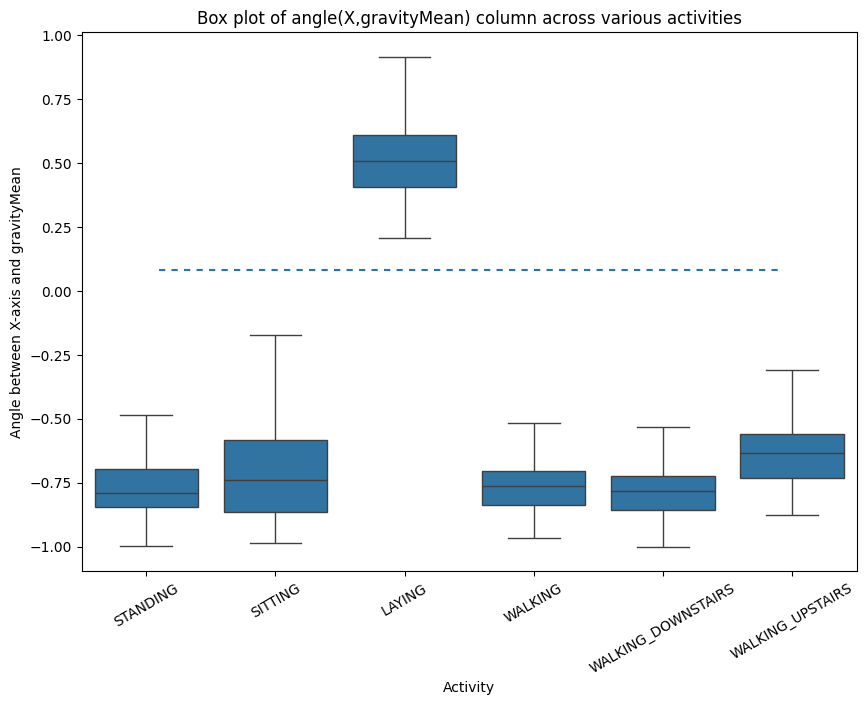

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

# **Analysing Angle between Y-axis and gravityMean feature**

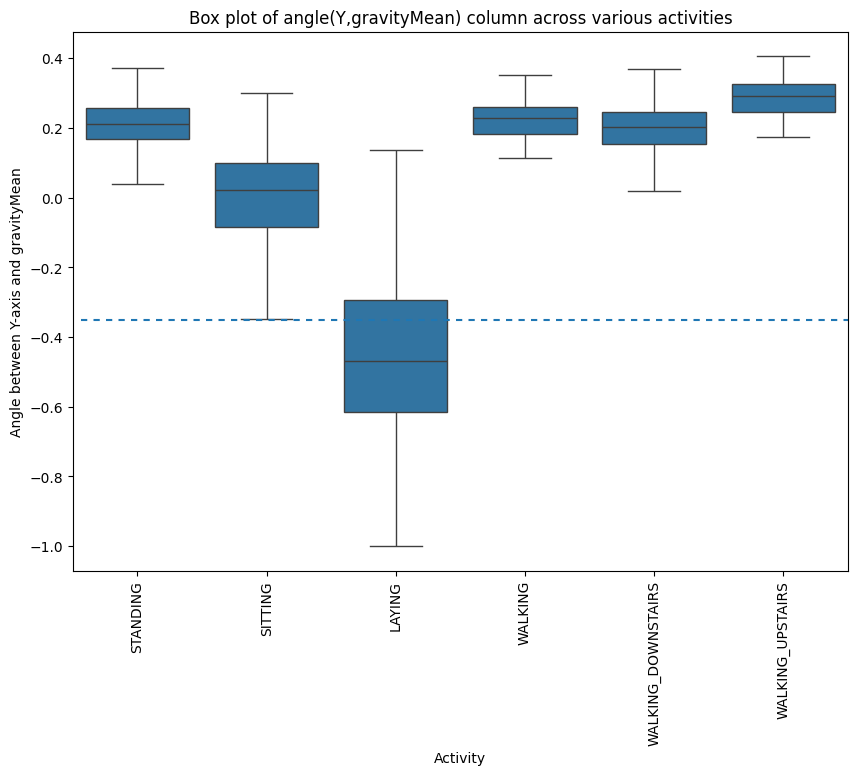

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()

# **Visualizing data using PCA(principal componenet analysing) technique**

In [17]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca) #n-components=2; 561 feature converted to two feature

In [18]:
pca

array([[-5.5202803 ,  0.29027752],
       [-5.53534954,  0.08253025],
       [-5.47498801, -0.28738705],
       ...,
       [ 5.85750527,  3.08184349],
       [ 5.42109482,  3.42643018],
       [ 5.49797027,  2.78992873]])

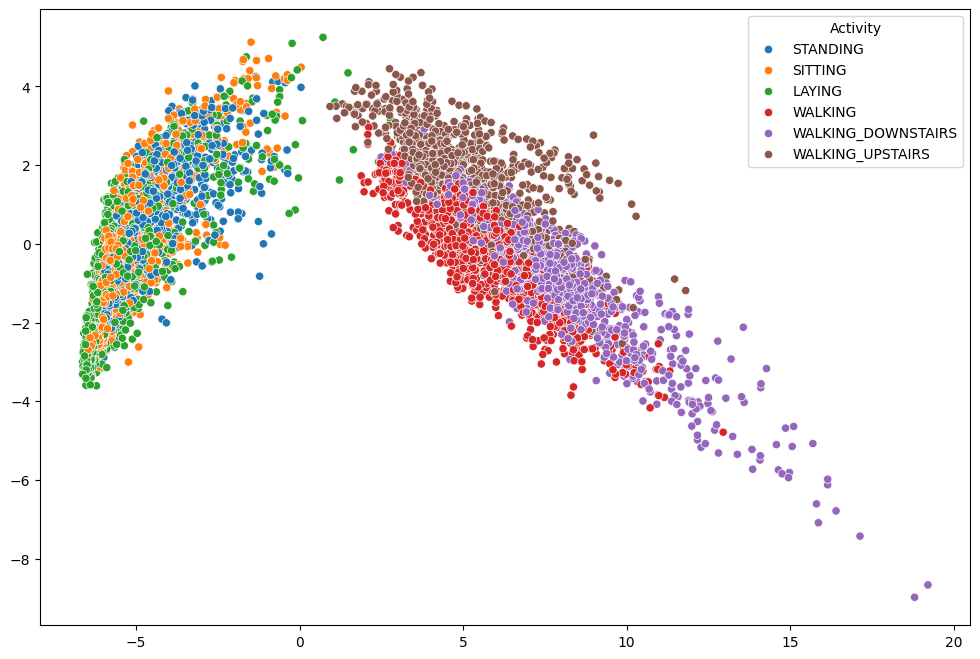

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()

from the graph we can conclude that standing, sitting and lying share a lot of common data similarly dynamic feature( walking , walking upstairs  and walking downstairs) shares the rest of parameter.

# Visualizing data using t-SNE

In [20]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

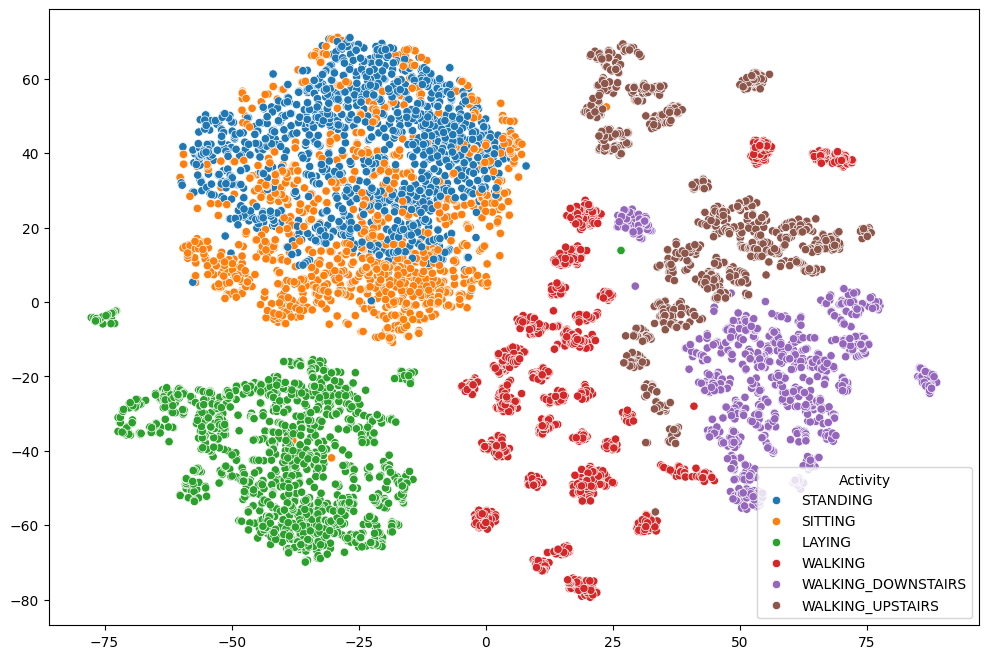

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

# ML Model




In [28]:
#Splitting the data into training and testing
X_train = train.drop(['subject', 'Activity'], axis = 1)#train set
y_train = train.Activity

X_test = test.drop(['subject', 'Activity'], axis = 1)#test set
y_test = test.Activity

In [29]:
print('Number of Training data: ', X_train.shape)
print('Number of Testing data : ', X_test.shape)

Number of Training data:  (7352, 561)
Number of Testing data :  (999, 561)


# Logistic Regressing model with hyperparameter tuning and cross validation

In [31]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_iter': [100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions= parameters, cv = 5, random_state=42)
lr_classifier_rs.fit(X_train, y_train)
y_pred_lr = lr_classifier_rs.predict(X_test)

In [44]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.953953953953954


In [45]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [46]:
cm = confusion_matrix(y_test.values,y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 146,  21,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]])

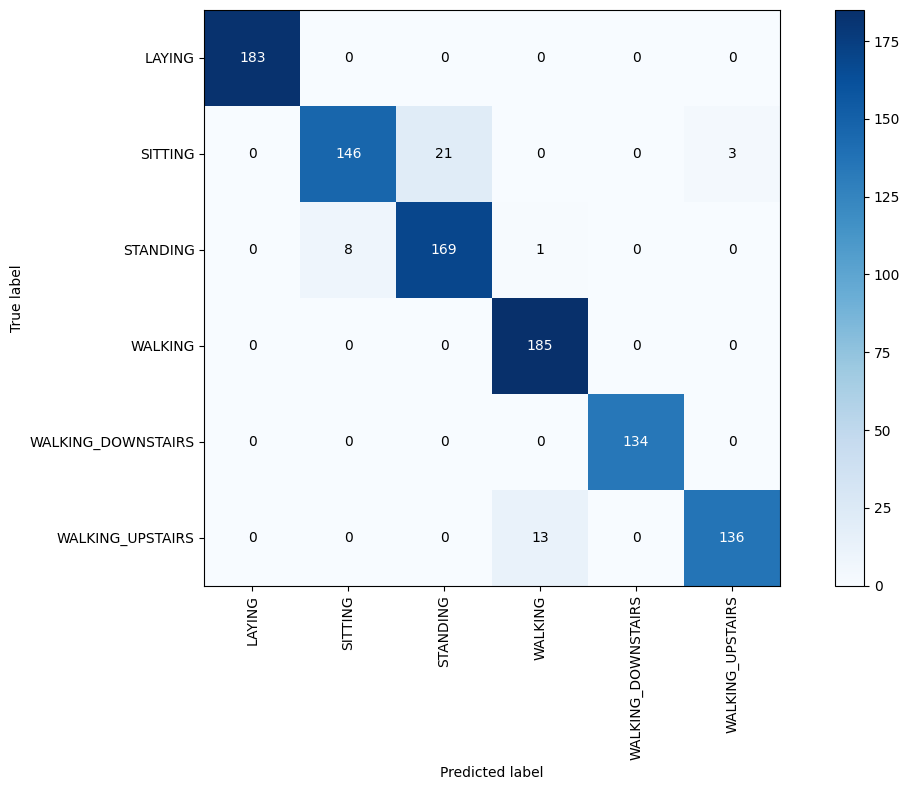

In [47]:
cm = confusion_matrix(y_test.values,y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))



In [48]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    #print("Best score : ", model.best_score_)

In [49]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=500)
Best set of parameters :  {'max_iter': 500}


# Kernel SVM model with Hyperparameter tuning and cross validation

In [50]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state=42)
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [51]:
y_pred = svm_rs.predict(X_test)

In [52]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy by using Kernel SVM : ", kernel_svm_accuracy)

Accuracy by using Kernel SVM :  0.965965965965966


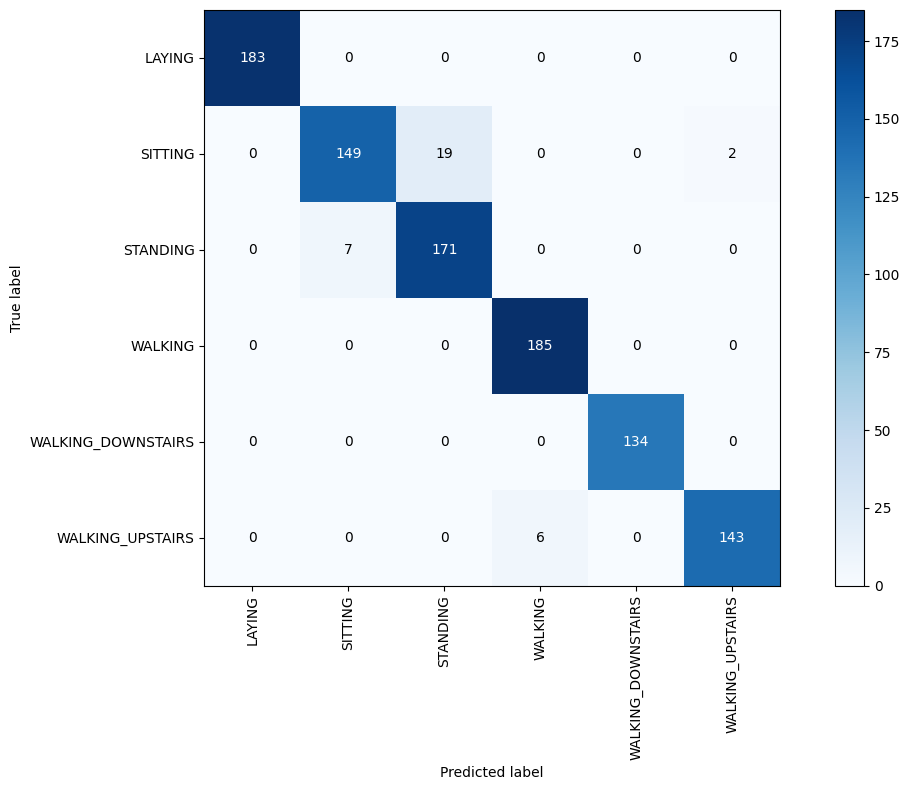

In [53]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [54]:
get_best_randomsearch_results(svm_rs)

Best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}


# Decision tree model with Hyperparameter tuning and cross validation

In [66]:
parameters = {'max_depth': np.arange(4, 20, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18])},
                   random_state=42)

In [67]:
y_pred = dt_classifier_rs.predict(X_test)

In [68]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8548548548548549


getting 85.49% accuracy with decision tree

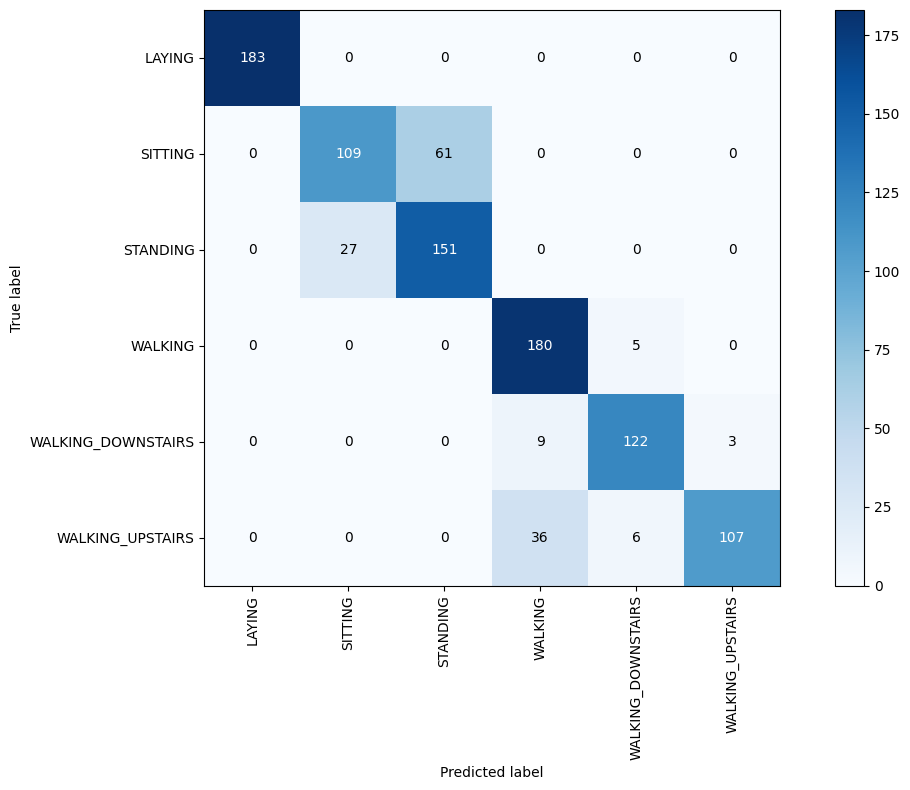

In [58]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

from the graph we can see lots of error in confusiin matrix

In [59]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}


# Random forest model with Hyperparameter tuning and cross validation

In [60]:
parameters = {
    'n_estimators':np.arange(20, 101, 10),
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [61]:
# getting best random search attributes
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=14)
Best set of parameters :  {'n_estimators': 100, 'max_depth': 14}


In [62]:
y_pred = rf_classifier_rs.predict(X_test)

In [63]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9179179179179179


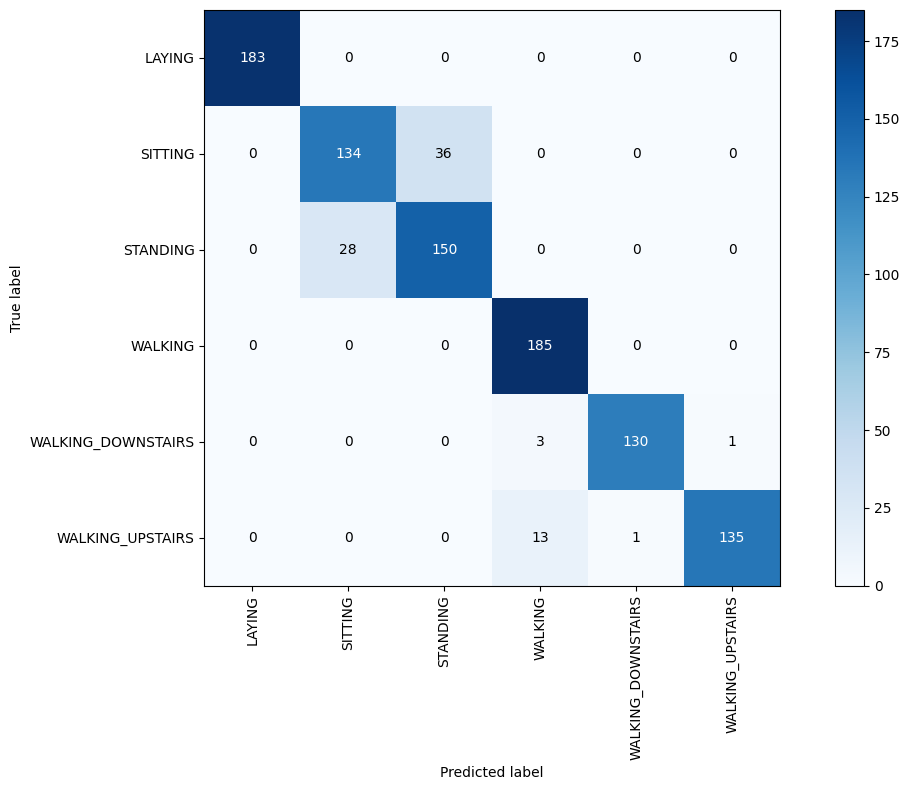

In [64]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))